<h3 style="color:rgb(132, 197, 206)" >PROJET DATASCIENCE L3  <br> <strong style="color:rgb(32, 197, 219);" >CLASSIFICATION-FRUITS SVM</strong> </h3>

<image src="TRAITEMENT_DES_DONNEES/image/image-redim/mangue-redim/mangue_104.png"></image>
<image src="TRAITEMENT_DES_DONNEES/image/image-redim/mangue-redim/mangue_77.png"></image>
<image src="TRAITEMENT_DES_DONNEES/image/image-sans-fond/bananes-sans-fond/banane_3.png"></image>
<image src="TRAITEMENT_DES_DONNEES/image/image-sans-fond/bananes-sans-fond/banane_45.png"></image>

<h3 style="color:rgb(32, 197, 219);">PRESENTATION DU PROJET</h3>
<p>
    <h4 >Probleme : <strong>classification de fruit</strong> </h4>
    <h4>Algorihtme : <strong>SVM</strong> </h4>
    <h4>Description : <br> 
        Le modele permettra de classer 04 types de fruits frequent dans les marches.
        Nous utilisont des plusieurs images de fruits isoles et etiquettes.
    </h4>
 </p>

 <h4>Etapes :</h4>
 <ol>
    <li>Collecte et préparation des données</li>
    <li>Extraction des caractéristiques</li>
    <li>Entraînement du modèle SVM</li>
    <li>Évaluation du modèle</li>
    <li>Test et déploiement</li>
    <li>Documentation</li>
 </ol>

<h4 style="text-align:left; color:rgb(32, 197, 219);"> Collecte et préparation des données</h4>

<h5 style="margin-left:15px;">[ <strong>A</strong> ]==>Presentation des donnees collectees</h5> <br>
<image src="TRAITEMENT_DES_DONNEES/image/data_image_redim/IMG_20240601_112700_518.jpg"></image>
<image src="TRAITEMENT_DES_DONNEES/image/banane-redim/IMG_20240601_130414_6.jpg"></image>
<image src="TRAITEMENT_DES_DONNEES/image/banane-redim/IMG_20240601_130650_3.jpg"></image>
<image src="TRAITEMENT_DES_DONNEES/image/mangue-redim/IMG_20240601_123721_064.jpg"></image>

<h4> [ <strong>B</strong> ]==> Redimensionnement de l'image</h4>
<p>Les images son redimensionner en 128X128 pour rendre les processus de manipulation de l'image 
    plus rapide tout en conservant une bonne partie des caracteristique de l'image</p>

In [1]:
import os
import glob 
from PIL import Image
import numpy as np


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [3]:
from sklearn.cluster import KMeans

In [4]:

# =======( fonction permettant de redimentionner une image )========
def redimensionner_image(folder_path_input, nouvelle_largeur, nouvelle_hauteur, folder_path_output, output_name):    
    image_names = getAllImageFIle(folder_path_input)
    
    images_redim = []
    i = 0
    for image_name in image_names:
        
        image = Image.open(image_name)
        image_redimensionnee = image.resize((nouvelle_largeur, nouvelle_hauteur))
        image_name = image_name.split("/")[len(image_name.split("/")) - 1]
        image_name = output_name + "_" + str(i) + "." + ".png"
        # image_name = output_name + "_" + str(i) + "." + image_name.split(".")[1]
        new_path = folder_path_output + "/" + image_name
        print(new_path)

        image_redimensionnee.save(new_path)
        i += 1
        images_redim.append(image_redimensionnee)
        
    return images_redim

# =======( fonction permettant de recuperer toutes les images presentes dans un dossier )=======
def getAllImageFIle(path_folder):
    
    images = glob.glob(os.path.join(path_folder, "*.jpg"))+\
                glob.glob(os.path.join(path_folder, "*.jpeg"))+\
                glob.glob(os.path.join(path_folder, "*.png"))+\
                glob.glob(os.path.join(path_folder, "*.pgm"))+\
                glob.glob(os.path.join(path_folder, "*.bpm"))+\
                glob.glob(os.path.join(path_folder, "*.ppm"))+\
                glob.glob(os.path.join(path_folder, "*.JPG"))+\
                glob.glob(os.path.join(path_folder, "*.JPEG"))

    return images

<h5 style="color:red;"> <strong>!</strong> NOTE IMPORTANTE :</h5>
<p>pour utiliser la methode redimensionner_image il faut preciser le chemin
du dossier ou se trouve les images , preciser le chemin du dossier out l'image redimensionner sera stocker 
. Il faudra aussi preciser le nom que prendra le fichier en sortie et en fin la taille 
que vous voulez attribuer a votre image</p>

In [5]:
largeur = 128
hauteur = 128
chemin_vers_images = "FRUIT/PASTEQUES"
output_path = "TRAITEMENT_DES_DONNEES/image/image-redim/pasteque-redim"
output_name = "pasteque"
images = redimensionner_image(chemin_vers_images, largeur, hauteur, output_path, output_name)

<h4>[ <strong>C</strong> ]==> Suppression de l'arriere-plan de l'image</h4>

In [6]:
from rembg import remove 

In [7]:

def remove_background(folder_path_input, folder_path_output, output_name):
    
    image_names = getAllImageFIle(folder_path_input)
    
    images_bg_remv = []
    i = 0
    for image_name in image_names:
        
        image = Image.open(image_name)
        image_sans_bg = remove(image)
        image_name = image_name.split("/")[len(image_name.split("/")) - 1]
        image_name = output_name + "_" + str(i) + "." + "png"
        new_path = folder_path_output + "/" + image_name
        # print(new_path)

        image_sans_bg.save(new_path)
        i += 1
        images_bg_remv.append(image_sans_bg)
        
    return images_bg_remv
    




In [8]:
chemin_vers_images = "TRAITEMENT_DES_DONNEES/image/image-redim/pasteque-redim"
output_path = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/pasteques-sans-fond"
output_name = "pasteque"

images = remove_background(chemin_vers_images, output_path, output_name)

<h4>[ <strong>D</strong> ]==> Labelisation et normalisation de l'image</h4>

In [9]:
import numpy as np
import cv2
from skimage import io
from sklearn.preprocessing import StandardScaler
import os
from PIL import Image

In [10]:
def chargement_images(folder_path):
    images = []
    labels = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            img = Image.open(os.path.join(folder_path, filename))
            
            if img is not None:
                images.append(img)
                
        labels.append(filename.split('_')[0])
        
    return  images, labels

In [11]:
# chemin_vers_images = "TRAITEMENT_DES_DONNEES/image/image-redim/mangue-redim"

# images, labels = chargement_images(chemin_vers_images)


In [12]:
img = np.array(images[0])
print(images[0])
for i in range(128):
    for j in range(128):
        print(images[1].getpixel((i, j)))

labels[0]


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
def labelisation_normalisation(images,  labels):
    images_traite = []
    encoder = LabelEncoder()
    labels_encodes = encoder.fit_transform(labels)
    for img in images:
        # img = np.array(img)
        # img = img / 255.0
        images_traite.append(img)
    
    return images_traite, labels_encodes

In [15]:

# images, labels = labelisation_normalisation(images, labels)

In [16]:
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import data, exposure, io
from skimage.color import rgb2gray
import cv2
import pandas as pd

In [17]:
# images[0]

## chargememt des donnees

In [18]:
# ======( importation des donnees )===========

chemin_vers_images1 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/ananas-sans-fond"

images1, labels1 = chargement_images(chemin_vers_images1)
# images1[1]


In [19]:
chemin_vers_images2 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/avocat-sans-fond"

images2, labels2 = chargement_images(chemin_vers_images2)
# images2[1]

In [20]:
chemin_vers_images3 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/bananes-sans-fond"

images3, labels3 = chargement_images(chemin_vers_images3)
# images3[1]

In [21]:
chemin_vers_images4 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/mangues-sans-fond"

images4, labels4 = chargement_images(chemin_vers_images4)
# images4[1]


In [22]:
chemin_vers_images5 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/pasteques-sans-fond"

images5, labels5 = chargement_images(chemin_vers_images5)
# images5[1]


In [23]:
images = images1 + images2 + images3 + images4 + images5
labels = labels1 + labels2 + labels3 + labels4 + labels5

In [29]:
data = pd.DataFrame()
data["images"] = images
data["labels"] = labels

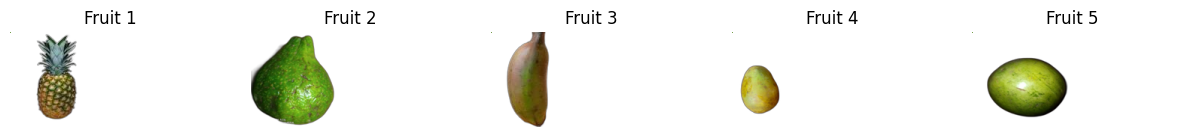

In [25]:
# Créer une figure avec 5 sous-plots

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
list_images = []
list_images.append(images1[0])
list_images.append(images2[0])
list_images.append(images3[0])
list_images.append(images4[0])
list_images.append(images5[0])
# Parcourir les images des fruits
i = 0
for image in list_images:
    # Charger l'image
    
    # Convertir l'image en tableau numpy
    image_array = np.array(image)
    
    # Afficher l'image dans le sous-plot correspondant
    axes[i].imshow(image_array)
    axes[i].axis('off')
    axes[i].set_title(f'Fruit {i+1}')
    
    # Extraire les histogrammes des canaux rouge, vert et bleu
    r_hist, _, _ = axes[i].hist(image_array[:, :, 0].ravel(), bins=256, range=(0, 256), density=True, alpha=0.5, label='Rouge')
    g_hist, _, _ = axes[i].hist(image_array[:, :, 1].ravel(), bins=256, range=(0, 256), density=True, alpha=0.5, label='Vert')
    b_hist, _, _ = axes[i].hist(image_array[:, :, 2].ravel(), bins=256, range=(0, 256), density=True, alpha=0.5, label='Bleu')
    
    i += 1
    
plt.show()

## Extraction de caracteristique

In [41]:
# ========( fonction pour l'extraction des caracteristique de l'image )======

def extract_caracteristiques(images):
    points_cles = []
    descripteurs = []
    # images = images[:3]
    plt.figure(figsize=(20, 10))
    i = 1
    for image in images:
        image = np.array(image)
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        shift = cv2.SIFT_create()
    
        # keypoints, descriptors = shift.compute(image_gray, keypoints)
        keypoints, descriptors = shift.detectAndCompute(image_gray, None)
        points_cles.append(keypoints)
        if descriptors is not None:
            descripteurs.append(descriptors)
        else:
            descripteurs.append(np.array([]))
        
    return points_cles, descripteurs
        

In [42]:
point_cle, descripteur = extract_caracteristiques(data['images'])
print(len(descripteur[0]), len(descripteur[1]), len(descripteur[2]))

170 155 110


<Figure size 2000x1000 with 0 Axes>

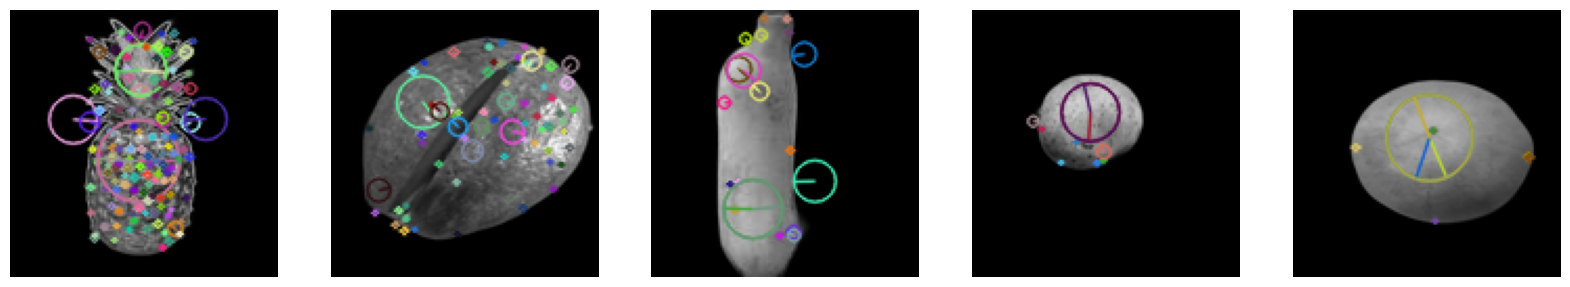

In [43]:
plt.figure(figsize=(20, 10))

img1 = cv2.drawKeypoints(cv2.cvtColor(np.array(data['images'][0]), cv2.COLOR_RGB2GRAY), point_cle[0], descripteur[0] ,None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img2 = cv2.drawKeypoints(cv2.cvtColor(np.array(data['images'][300]), cv2.COLOR_RGB2GRAY), point_cle[300], descripteur[300] ,None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img3 = cv2.drawKeypoints(cv2.cvtColor(np.array(data['images'][600]), cv2.COLOR_RGB2GRAY), point_cle[600], descripteur[600] ,None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img4 = cv2.drawKeypoints(cv2.cvtColor(np.array(data['images'][900]), cv2.COLOR_RGB2GRAY), point_cle[900], descripteur[900] ,None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img5 = cv2.drawKeypoints(cv2.cvtColor(np.array(data['images'][1000]), cv2.COLOR_RGB2GRAY), point_cle[1000], descripteur[1000] ,None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
# img = cv2.drawKeypoints(image_gray, keypoints ,None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
list_img = []
list_img.append(img1)
list_img.append(img2)
list_img.append(img3)
list_img.append(img4)
list_img.append(img5)
i = 1
for img in list_img:
    ax = plt.subplot(2, 5, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    i += 1
plt.show()


In [44]:
# Créer le "sac de mots visuels"
n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(np.concatenate([d for d in descripteur if d.size > 0], axis=0))
visual_words = kmeans.cluster_centers_

In [45]:
# Calculer les histogrammes de mots visuels
X_bow = []
for desc in descripteur:
    if desc.size > 0:
        histogram, _ = np.histogram(kmeans.predict(desc), bins=n_clusters, range=(0, n_clusters))
        X_bow.append(histogram)
    else:
        X_bow.append(np.zeros(n_clusters))

In [46]:
# Entraîner le classifieur SVM
X_train, X_test, y_train, y_test = train_test_split(X_bow, data['labels'], test_size=0.2, random_state=42)


In [ ]:
# Entraînement du modèle SVM
Cs = np.logspace(-2, 2, 5)  # Valeurs de C à tester
train_scores_poly = []
test_scores_poly = []


for c in Cs:
    svm_model_poly = SVC(C=c, kernel='poly')
    svm_model_poly.fit(X_train, y_train)
    train_scores_poly.append(svm_model_poly.score(X_train, y_train))
    test_scores_poly.append(svm_model_poly.score(X_test, y_test))

Accuracy: 0.7721518987341772
Classification Report:
               precision    recall  f1-score   support

      ananas       0.92      0.94      0.93        35
      avocat       0.96      0.82      0.88        60
      banane       0.89      0.72      0.79        43
      mangue       0.80      0.41      0.54        49
    pasteque       0.56      1.00      0.71        50

    accuracy                           0.77       237
   macro avg       0.82      0.78      0.77       237
weighted avg       0.82      0.77      0.77       237



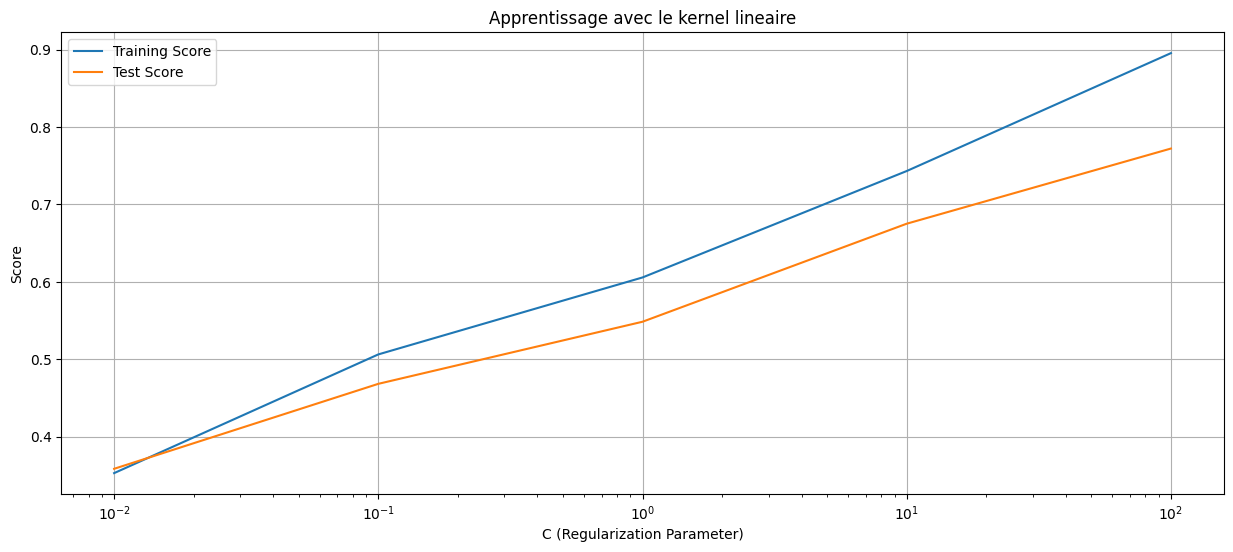

In [ ]:
# Prédiction sur l'ensemble de test
y_pred = svm_model_poly.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(15, 6))
plt.semilogx(Cs, train_scores_poly, label='Training Score')
plt.semilogx(Cs, test_scores_poly, label='Test Score')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Apprentissage avec le kernel lineaire')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve

/home/pharaon/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/home/phar

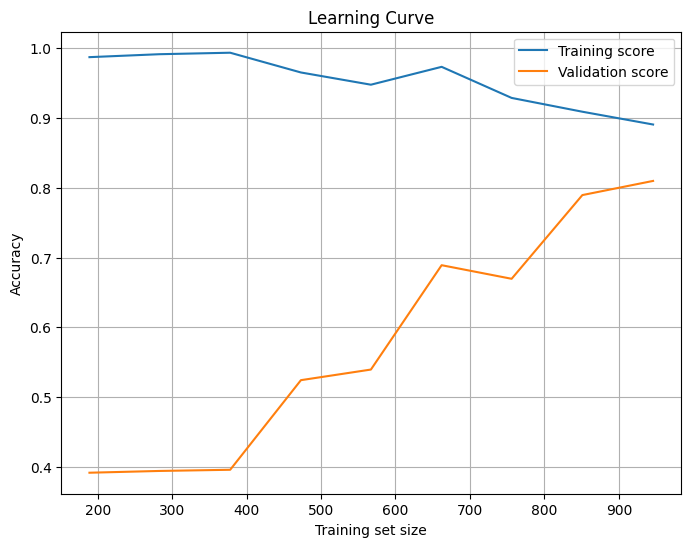

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
    svm_model_poly, X_bow, data['labels'], cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

## kernel lineare 

In [ ]:
# Entraînement du modèle SVM
Cs = np.logspace(-2, 2, 5)  # Valeurs de C à tester
train_scores_linea = []
test_scores_linea = []


for c in Cs:
    svm_model_linea = SVC(C=c, kernel='linear')
    svm_model_linea.fit(X_train, y_train)
    train_scores_linea.append(svm_model_linea.score(X_train, y_train))
    test_scores_linea.append(svm_model_linea.score(X_test, y_test))

Accuracy: 0.8776371308016878
Classification Report:
               precision    recall  f1-score   support

      ananas       0.91      0.91      0.91        35
      avocat       0.90      0.88      0.89        60
      banane       0.80      0.77      0.79        43
      mangue       0.87      0.84      0.85        49
    pasteque       0.89      0.98      0.93        50

    accuracy                           0.88       237
   macro avg       0.88      0.88      0.88       237
weighted avg       0.88      0.88      0.88       237



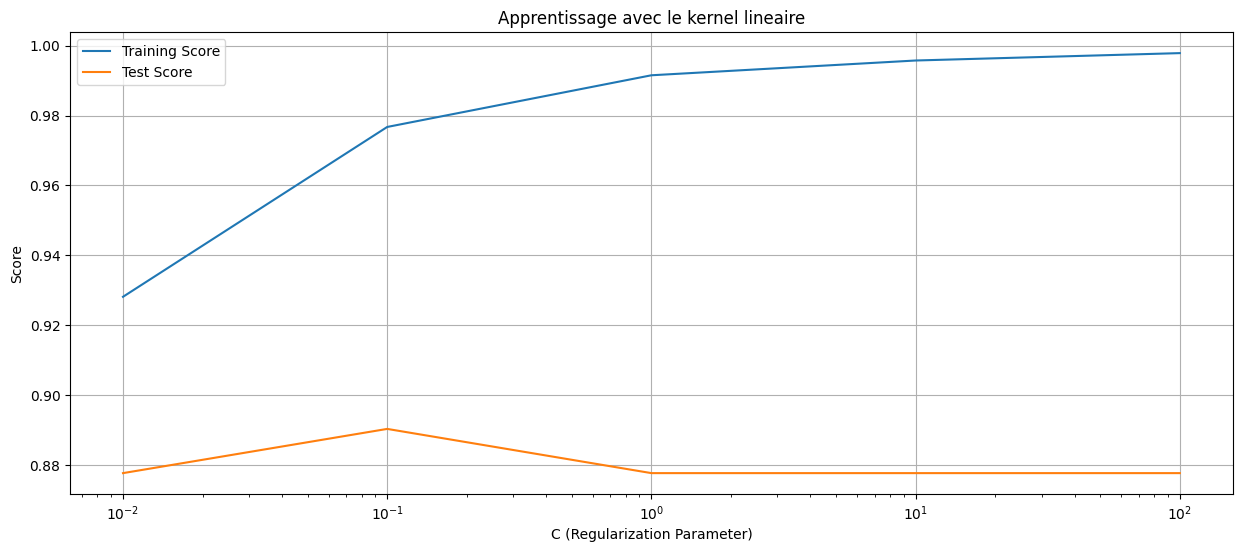

In [ ]:
# Prédiction sur l'ensemble de test
y_pred = svm_model_linea.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(15, 6))
plt.semilogx(Cs, train_scores_linea, label='Training Score')
plt.semilogx(Cs, test_scores_linea, label='Test Score')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Apprentissage avec le kernel lineaire')
plt.legend()
plt.grid()
plt.show()


/home/pharaon/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/home/phar

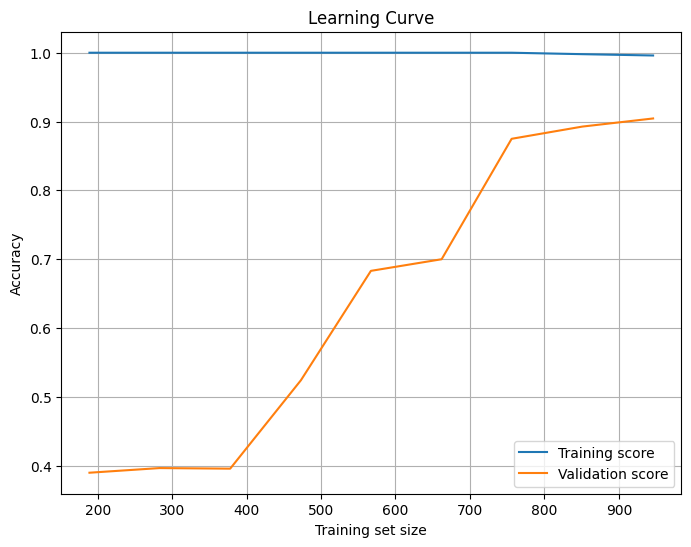

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
    svm_model_linea, X_bow, data['labels'], scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

## kernel gaussien

In [ ]:
# Entraînement du modèle SVM
Cs = np.logspace(-2, 2, 10)  # Valeurs de C à tester
train_scores_rbf = []
test_scores_rbf = []


for c in Cs:
    svm_model_rbf = SVC(C=c, kernel='rbf')
    svm_model_rbf.fit(X_train, y_train)
    train_scores_rbf.append(svm_model_rbf.score(X_train, y_train))
    test_scores_rbf.append(svm_model_rbf.score(X_test, y_test))

Accuracy: 0.9071729957805907
Classification Report:
               precision    recall  f1-score   support

      ananas       0.90      1.00      0.95        35
      avocat       0.93      0.93      0.93        60
      banane       0.94      0.79      0.86        43
      mangue       0.89      0.82      0.85        49
    pasteque       0.88      1.00      0.93        50

    accuracy                           0.91       237
   macro avg       0.91      0.91      0.91       237
weighted avg       0.91      0.91      0.91       237



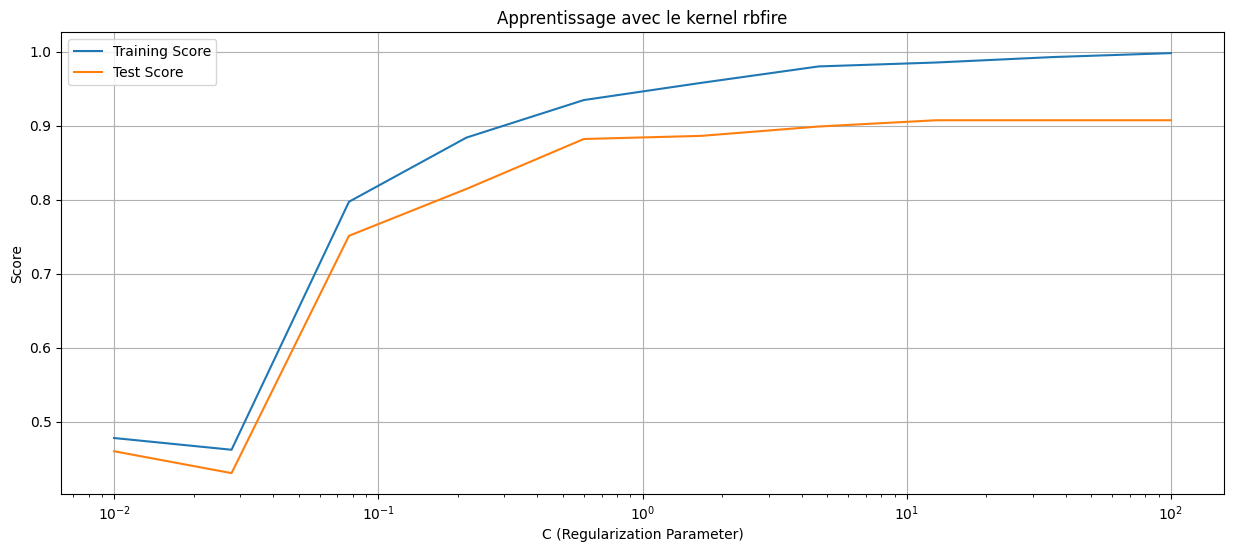

In [ ]:
# Prédiction sur l'ensemble de test
y_pred = svm_model_rbf.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(15, 6))
plt.semilogx(Cs, train_scores_rbf, label='Training Score')
plt.semilogx(Cs, test_scores_rbf, label='Test Score')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Apprentissage avec le kernel rbfire')
plt.legend()
plt.grid()
plt.show()


/home/pharaon/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/home/p

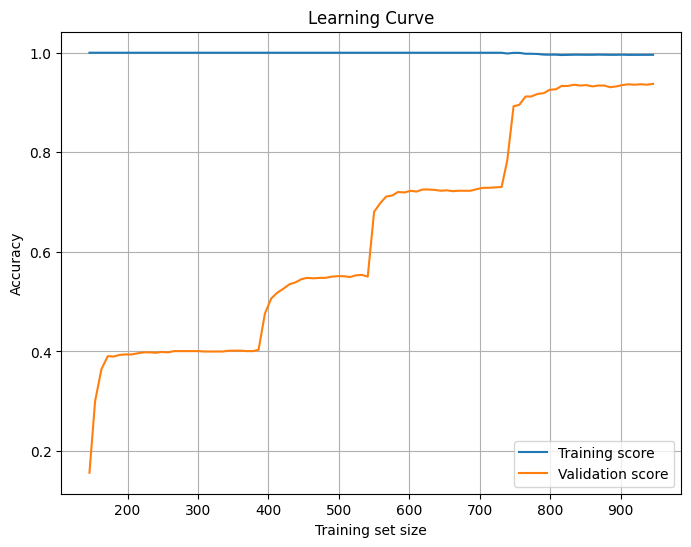

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
    svm_model_rbf, X_bow, data['labels'], cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 100))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

### Entrainement avec le meilleur hyperparametre

In [51]:
train_scores_rbf_f = []
test_scores_rbf_f = []


svm_model_rbf_f = SVC(C=200, kernel='rbf')
svm_model_rbf_f.fit(X_train, y_train)
# train_scores_rbf_f.append(svm_model_rbf.score(X_train, y_train))
# test_scores_rbf_f.append(svm_model_rbf.score(X_test, y_test))

# Prédiction sur l'ensemble de test
y_pred = svm_model_rbf_f.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9113924050632911
Classification Report:
               precision    recall  f1-score   support

      ananas       0.90      1.00      0.95        35
      avocat       0.93      0.93      0.93        60
      banane       0.94      0.79      0.86        43
      mangue       0.89      0.84      0.86        49
    pasteque       0.89      1.00      0.94        50

    accuracy                           0.91       237
   macro avg       0.91      0.91      0.91       237
weighted avg       0.91      0.91      0.91       237



In [55]:
from sklearn.model_selection import learning_curve

/home/pharaon/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/pharaon/.local/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/home/p

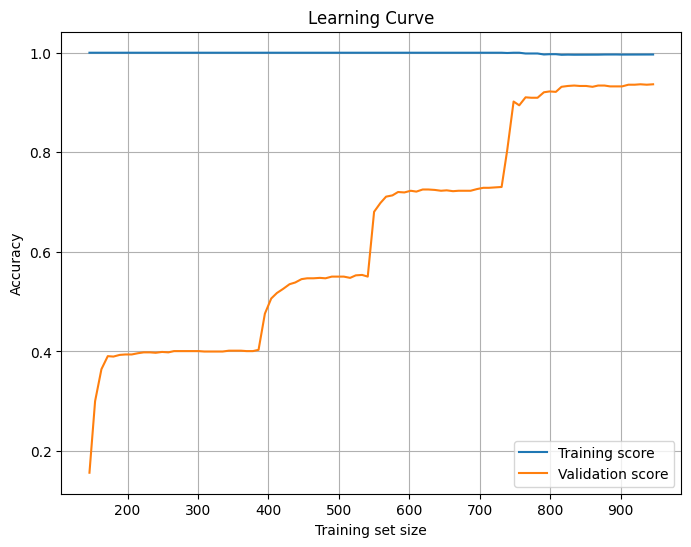

In [56]:
train_sizes, train_scores, validation_scores = learning_curve(
    svm_model_rbf_f, X_bow, data['labels'], cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 100))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [52]:
import joblib

In [53]:
nom_modele = "svm_model_sift.pkl"
joblib.dump(svm_model_rbf_f, nom_modele)

['svm_model_sift.pkl']